In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Read the data
df = pd.read_csv('Mall_Customers.csv')

In [3]:
# Print the first 5 rows of the data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Get the shape of the data
df.shape

(200, 5)

In [5]:
# Check the data types of the variables
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Check missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Drop the CustomerID column
df.drop('CustomerID', axis=1, inplace=True)

In [9]:
# Get the most important features
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

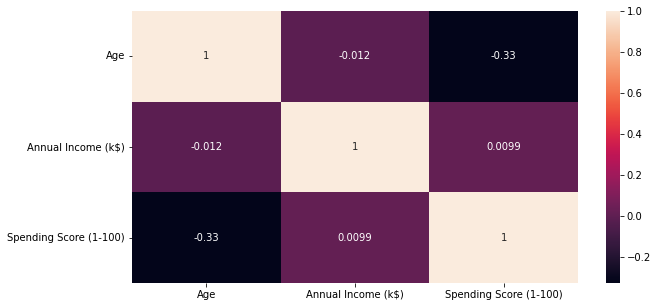

In [73]:
# Plot the correlation matrix
sns.heatmap(df.corr(), annot=True)

In [11]:
# Rename column
df.rename(columns={'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'}, inplace=True)

In [17]:
# Drop the gender column
df.drop('Gender', axis=1, inplace=True)
df.head()

,Age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


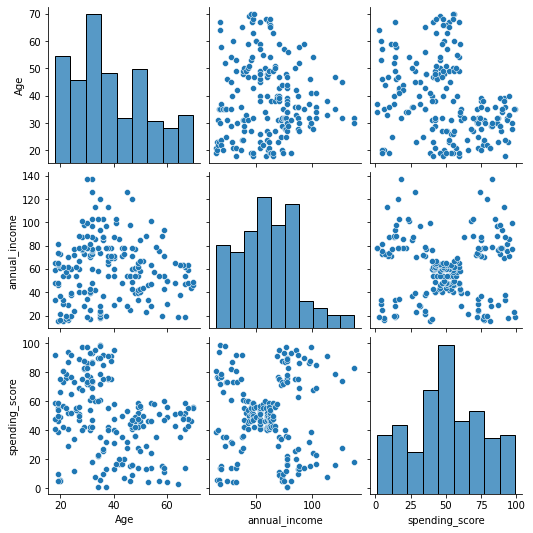

In [18]:
# Plot the data for each 2 columns
sns.pairplot(df)

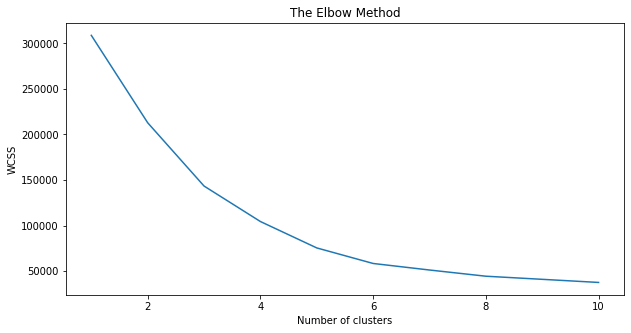

In [19]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
# Fit the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

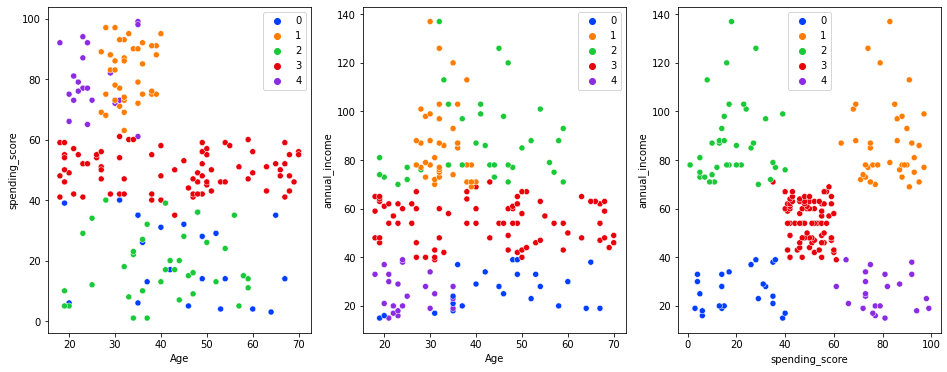

In [35]:
# Plot for each 2 columns
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
palette = sns.color_palette('bright', 5)
sns.scatterplot(x='Age', y='spending_score', hue=y_kmeans, palette=palette, data=df, ax=ax[0])
sns.scatterplot(x='Age', y='annual_income', hue=y_kmeans, palette=palette, data=df, ax=ax[1])
sns.scatterplot(x='spending_score', y='annual_income', hue=y_kmeans, palette=palette, data=df, ax=ax[2])

plt.show()

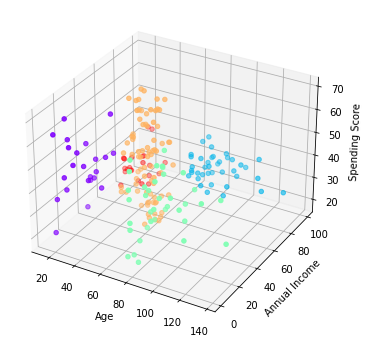

In [42]:
# 3d plot the Age, annual_income and spending_score
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['annual_income'], df['spending_score'], df['Age'], c=y_kmeans, cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()


In [36]:
# Add new column to the data
df['Cluster'] = y_kmeans

In [37]:
# Show the first 5 rows of the data
df.head()

,Age,annual_income,spending_score,Cluster
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0


In [38]:
# Data type of the Cluster column
df['Cluster'].dtype

dtype('int32')

In [39]:
df['Cluster'].unique()

array([0, 4, 3, 1, 2])

In [40]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))